# Preprocess for Sliders

In [40]:
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ipywidgets as ipywidgets
df = pd.read_csv("~/Desktop/Thesis/InfoVis_Fall_2015_Survey.csv")
df = df.set_index('Name')
dataHD = df.copy()
for column in dataHD.columns:
    dataHD[column] = (dataHD[column]-dataHD[column].mean())/dataHD[column].std()
dataHD.head()

,Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,...,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications
Name,,,,,,,,,,,,,,,,,,,,,
Sangeetha,-0.404611,-1.530706,-0.261505,0.095682,0.293482,-0.502268,-0.187416,0.141207,0.893553,-0.897742,...,0.447088,0.903888,0.835355,0.989008,-0.352654,-0.828475,-0.594105,-0.381897,-0.443943,-0.271287
Gracie,-0.595356,-0.737303,0.601461,0.095682,-0.429272,1.593402,-1.917407,-0.226675,-1.042152,-1.023808,...,-0.184273,0.903888,2.071532,-1.177020,0.270788,0.240177,-0.594105,-0.331886,0.061234,-0.099124
Testing123,-0.213866,0.585034,-0.261505,-2.430316,0.438033,-2.178804,1.758824,-0.226675,0.409626,-0.771676,...,1.809500,0.378742,-0.153586,0.715399,-0.352654,-0.917529,-0.594105,-0.381897,-0.443943,-0.099124
Guangyue,0.549115,-0.208368,-1.124471,0.095682,0.510308,0.450309,-0.403665,-1.044190,-1.493817,0.615049,...,0.314170,-1.721843,-0.400821,0.564678,-0.352654,-0.116040,-0.594105,-0.465247,0.818999,-0.156512
Harsh,-0.786101,-0.472836,-0.261505,1.358681,0.654859,0.640825,1.110078,0.590841,1.054862,-1.023808,...,0.314170,-0.146404,-0.400821,1.855787,-0.768282,-0.917529,-0.932130,-0.465247,-0.949120,-0.213900


In [41]:
# initialize the sliders value to be 0.5
val = 0.5
Age = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Shoe = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Siblings = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
SleepHours = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Temperature = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Pets = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Extrovert = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Cook = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Spicey = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Restaurants = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
SpendMoney = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
PhoneMinutes = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
PhoneApps=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Photos=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Facebook= ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
PCvMac=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
CS=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Books=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
DistanceBorn=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Countries=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
States=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
PlacesLived=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Camping=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
JobYears=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)
Publications=ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.05, value=val)

In [91]:
Age.value = 0.5
Age

FloatSlider(value=0.5, description='Age', max=1.0, step=0.05)

# MDS Function

In [42]:
import sklearn.metrics.pairwise
import sklearn.manifold

# standard MDS function, input a pairwise multi-dimentional dataset, output a 2D data
def cal_distance(dataHD):
    distHD = sklearn.metrics.pairwise.manhattan_distances(dataHD)
    distHD = pd.DataFrame(distHD, columns=dataHD.index, 
                          index=dataHD.index)
    # set up the parameters:
    mds = sklearn.manifold.MDS(n_components=2, dissimilarity='precomputed', n_init=100, max_iter=1000)

    # reduction algorithm happens here:
    data2D = mds.fit_transform(distHD)
    data2D = pd.DataFrame(data2D, columns=['x','y'], index=dataHD.index)
    return data2D

# Interactive Plot with Sliders

In [92]:
# this method is to make an interactive scatter plot correlated with sldiers
# the input are sliders' values
# the output is the scatter plot

def plot(Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,SpendMoney,PhoneMinutes,PhoneApps,Photos,Facebook,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications):
    # capy sliders value to a weight list 
    # scale the weight list so it can sum to 1
    weight_list = [Age,Shoe,Siblings,SleepHours,Temperature,Pets,Extrovert,Cook,Spicey,Restaurants,SpendMoney,PhoneMinutes,PhoneApps,Photos,Facebook,PCvMac,CS,Books,DistanceBorn,Countries,States,PlacesLived,Camping,JobYears,Publications]
    weight_list = [x/sum(weight_list) for x in weight_list]
    df = pd.read_csv("~/Desktop/Thesis/InfoVis_Fall_2015_Survey.csv")
    df = df.set_index('Name')
    dataHD = df.copy()
    
    # normalize the data
    for column in dataHD.columns:
        dataHD[column] = (dataHD[column]-dataHD[column].mean())/dataHD[column].std()
    # apply weights to the data
    for i in range(len(dataHD.columns.tolist())):
        dataHD.iloc[:, i] = [x*weight_list[i] for x in dataHD.iloc[:, i]]
    
    # calculate distance and return points
    data2D = cal_distance(dataHD)
    # split the Data to x and y
    x = data2D['x'].tolist()
    y = data2D['y'].tolist()
    X = zip(x, y)
    #print(X)
    labels = data2D.index.values.tolist()
    
    # Create the figure and axes objects
    fig, ax = plt.subplots(1, figsize=(10, 6))
    fig.suptitle('Distribution of Students')
    ax.scatter(x, y,
           color="blue",  # Color of the dots
           s=100,         # Size of the dots
           alpha=0.5,     # Alpha of the dots
           linewidths=1)  # Size of edge around the dots

    # Add the participant names as text labels for each point
    for x_pos, y_pos, label in zip(x, y, labels):
        ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(7, 0),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
    # Show the plot
    plt.show()
    

interactive_plot = interactive(plot, Age=Age,Shoe=Shoe,Siblings=Siblings,SleepHours=SleepHours,Temperature=Temperature,
                               Pets=Pets,Extrovert=Extrovert,Cook=Cook,Spicey=Spicey,Restaurants=Restaurants,
                               SpendMoney=SpendMoney,PhoneMinutes=PhoneMinutes,PhoneApps=PhoneApps,Photos=Photos,
                               Facebook=Facebook,PCvMac=PCvMac,CS=CS,Books=Books,DistanceBorn=DistanceBorn,Countries=Countries,
                               States=States,PlacesLived=PlacesLived,Camping=Camping,JobYears=JobYears,Publications=Publications)
output = interactive_plot.children[-1]
#output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='Age', max=1.0, step=0.05), FloatSlider(value=0.5, de…

In [93]:
# initialize the sliders value to be 0.5
Age.value = weight_list[0]
Shoe.value = weight_list[1]
Siblings.value = weight_list[2]
SleepHours.value = weight_list[3]
Temperature.value = weight_list[4]
Pets.value = weight_list[5]
Extrovert.value = weight_list[6]
Cook.value = weight_list[7]
Spicey.value = weight_list[8]
Restaurants.value = weight_list[9]
SpendMoney.value = weight_list[10]
PhoneMinutes.value = weight_list[11]
PhoneApps.value = weight_list[12]
Photos.value = weight_list[13]
Facebook.value = weight_list[14]
PCvMac.value = weight_list[15]
CS.value = weight_list[16]
Books.value = weight_list[17]
DistanceBorn.value = weight_list[18]
Countries.value = weight_list[19]
States.value = weight_list[20]
PlacesLived.value = weight_list[21]
Camping.value = weight_list[22]
JobYears.value = weight_list[23]
Publications.value = weight_list[24]

# Visualize the Weights

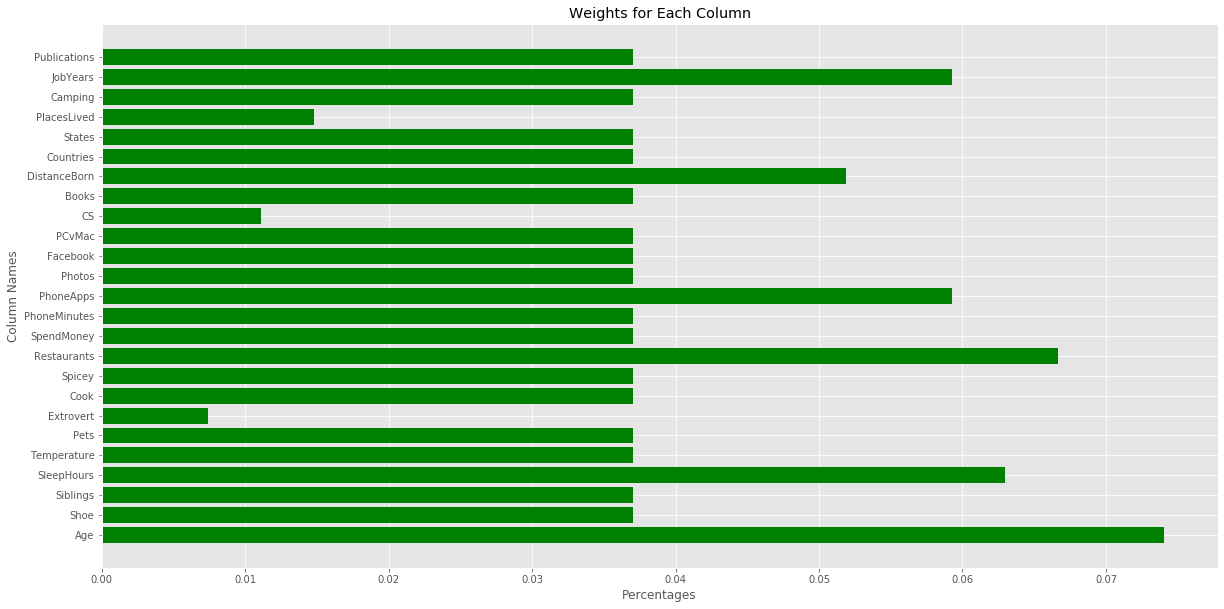

In [81]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
weight_list = [Age.value,Shoe.value,Siblings.value,SleepHours.value,Temperature.value,Pets.value,Extrovert.value,
               Cook.value,Spicey.value,Restaurants.value,SpendMoney.value,PhoneMinutes.value,PhoneApps.value,
               Photos.value,Facebook.value,PCvMac.value,CS.value,Books.value,DistanceBorn.value,Countries.value,
               States.value,PlacesLived.value,Camping.value,JobYears.value,Publications.value]
weight_list = [x/sum(weight_list) for x in weight_list]
x = dataHD.columns.tolist()
energy = weight_list

x_pos = [i for i, _ in enumerate(x)]
fig, ax = plt.subplots(figsize=(20, 10))
plt.barh(x_pos, energy, color='green')
plt.ylabel("Column Names")
plt.xlabel("Percentages")
plt.title("Weights for Each Column")

plt.yticks(x_pos, x)
plt.show()

# Draggable Plot with Updated Weights

In [45]:
%matplotlib notebook
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sat Mar  4 10:57:02 2017

@author: Nathan Wycoff
"""

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

class DraggablePoints(object):
    def __init__(self, artists, tolerance=5):
        for artist in artists:
            artist.set_picker(tolerance)
        self.artists = artists
        self.currently_dragging = False
        self.current_artist = None
        self.offset = (0, 0)

        for canvas in set(artist.figure.canvas for artist in self.artists):
            canvas.mpl_connect('button_press_event', self.on_press)
            canvas.mpl_connect('button_release_event', self.on_release)
            canvas.mpl_connect('pick_event', self.on_pick)
            canvas.mpl_connect('motion_notify_event', self.on_motion)

    def on_press(self, event):
        self.currently_dragging = True

    def on_release(self, event):
        self.currently_dragging = False
        self.current_artist = None
        self.signal.updatedSignal.emit(str(self.point.newYcoordinate))
        self.dragValue.signal.updatedSignal.connect(self.updatedValue)

    def on_pick(self, event):
        if self.current_artist is None:
            self.current_artist = event.artist
            x0, y0 = event.artist.center
            x1, y1 = event.mouseevent.xdata, event.mouseevent.ydata
            self.offset = (x0 - x1), (y0 - y1)

    def on_motion(self, event):
        if not self.currently_dragging:
            return
        if self.current_artist is None:
            return
        dx, dy = self.offset
        self.current_artist.center = event.xdata + dx, event.ydata + dy
        self.current_artist.figure.canvas.draw()

[0.07692307692307693, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464, 0.038461538461538464]


<IPython.core.display.Javascript object>


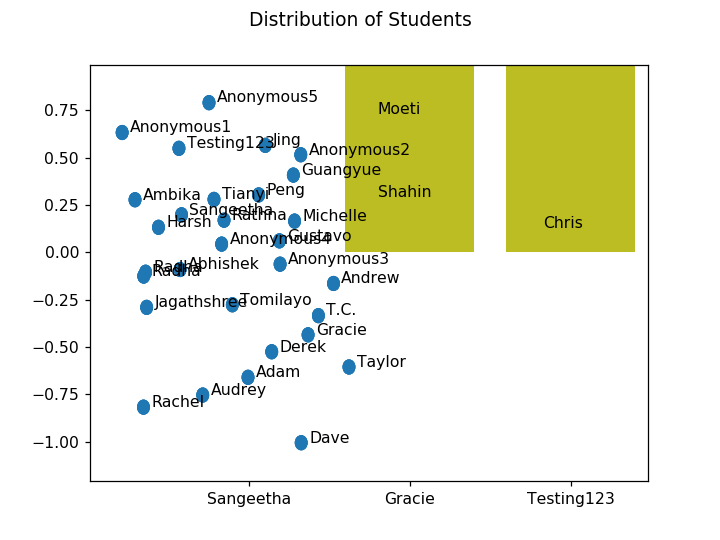

In [46]:
# read in the data
df = pd.read_csv("~/Desktop/Thesis/InfoVis_Fall_2015_Survey.csv")
df = df.set_index('Name')
dataHD = df.copy()

# get current weight list and scale it 
weight_list = [Age.value,Shoe.value,Siblings.value,SleepHours.value,Temperature.value,Pets.value,Extrovert.value,
               Cook.value,Spicey.value,Restaurants.value,SpendMoney.value,PhoneMinutes.value,PhoneApps.value,
               Photos.value,Facebook.value,PCvMac.value,CS.value,Books.value,DistanceBorn.value,Countries.value,
               States.value,PlacesLived.value,Camping.value,JobYears.value,Publications.value]
weight_list = [x/sum(weight_list) for x in weight_list]
print(weight_list)

# normalize the data
for column in dataHD.columns:
    dataHD[column] = (dataHD[column]-dataHD[column].mean())/dataHD[column].std()

# apply weights to the data
for i in range(len(dataHD.columns.tolist())):
    dataHD.iloc[:, i] = [x*weight_list[i] for x in dataHD.iloc[:, i]]    

# calculate distance and return points
data2D = cal_distance(dataHD)

# Split the Data to x and y
x = data2D['x'].tolist()
y = data2D['y'].tolist()
X = np.column_stack((x, y))
labels = data2D.index.values.tolist()
    
# Set up the axes
fig, ax = plt.subplots()
ax.set(xlim=[min(X[:,0]) - 0.2, max(X[:,0]) + 0.7], ylim=[min(X[:,1]) - 0.2, max(X[:,1]) + 0.2])
labels = data2D.index.values.tolist()
#print(labels)    

# Create the figure and axes objects
fig.suptitle('Distribution of Students')

# Add the participant names as text labels for each point
for x_pos, y_pos, label in zip(x, y, labels):
    ax.annotate(label,             # The label for this point
                xy=(x_pos, y_pos), # Position of the corresponding point
                xytext=(5, 3),     # Offset text by 7 points to the right
                textcoords='offset points', # tell it to use offset points
                ha='left',         # Horizontally aligned to the left
                va='center')       # Vertical alignment is centered
#Prep our circles
circles = [patches.Circle((xy[0], xy[1]), 0.04, alpha = 1) for i, xy in enumerate(X)]
for circ in circles:
    #print(circ.center)
    ax.add_patch(circ)
dr = DraggablePoints(circles)
#print(dr)

#Make the plot!
plt.show()

# Retrieve Updated Coordinates

In [50]:
# Retrieve the old coordinate 
new_x = []
new_y = []
for circ in circles:
    new_x += [circ.center[0]]
    new_y += [circ.center[1]]
    ax.add_patch(circ)

# get new coordinate of points which have been moved
updated_coordinates = np.column_stack((new_x, new_y))

# test the difference between old and new coordinates
for i in range(len(X)):
    print("Old:", X[i], "   New:",updated_coordinates[i])

Old: [-0.41944375  0.19869744]    New: [-0.41944375  0.19869744]
Old: [ 0.36747457 -0.43524555]    New: [ 0.36747457 -0.43524555]
Old: [-0.43569043  0.54968794]    New: [-0.43569043  0.54968794]
Old: [0.27585626 0.40837144]    New: [0.27585626 0.40837144]
Old: [-0.5627807   0.13254407]    New: [-0.5627807   0.13254407]
Old: [0.0603212 0.3035398]    New: [0.0603212 0.3035398]
Old: [-0.78883943  0.63325103]    New: [-0.78883943  0.63325103]
Old: [-0.70881707  0.27814517]    New: [-0.70881707  0.27814517]
Old: [0.75161247 0.28971709]    New: [0.75161247 0.28971709]
Old: [-0.63644179 -0.29025955]    New: [-0.63644179 -0.29025955]
Old: [0.32198995 0.5158283 ]    New: [0.32198995 0.5158283 ]
Old: [-0.28773802 -0.75328993]    New: [-0.28773802 -0.75328993]
Old: [0.10153337 0.5652997 ]    New: [0.10153337 0.5652997 ]
Old: [-0.42849053 -0.09033068]    New: [-0.42849053 -0.09033068]
Old: [0.18930406 0.06102769]    New: [0.18930406 0.06102769]
Old: [ 0.19349613 -0.06211327]    New: [ 0.19349613 -

In [51]:
# create low dimentional dataframe
lowD = pd.DataFrame()
lowD["x"] = new_x
lowD['y'] = new_y
lowD.head()

,x,y
0,-0.419444,0.198697
1,0.367475,-0.435246
2,-0.435690,0.549688
3,0.275856,0.408371
4,-0.562781,0.132544


# Reverse lowD to highD

In [52]:
import random as random

# this method is used to propose a weight for current column
def proposal(current, step):
    #print("proposal---------------------------------------")
    output = -1
    while output < 0  or output >1:
        output = current + (random.random()-0.5)*step
    return output

# calculate the stress between old low-d data and new low-d data calculated by high-d data
def stress(highD, lowD, weight):
    #print(highD.head())
    #print("stress----------------------------------------")
    #print(weight)
    
    # get the length of row and columns
    row = len(highD)
    col = len(highD.columns.tolist())
    
    highDSum = 0
    output = 0
    
    # apply the weights to high-d data
    tmp_highD = highD.copy()
    for i in range(len(tmp_highD.columns.tolist())):
        tmp_highD.iloc[:, i] = [x*weight[i] for x in tmp_highD.iloc[:, i]]
    
    # convert high-d data to low-d data by MDS function
    new_lowD = cal_distance(tmp_highD)

    # scale lowD sum to 2
    tmp = new_lowD.values.sum()/2
    new_lowD = new_lowD/tmp
    
    # return the stress
    return abs(new_lowD.values-lowD.values).sum()

def invMDs(highD, lowD, weights):
    #print(highD.head())
    #print(lowD.head())
    
    # get the length of row and colum
    row = len(highD)
    col = len(highD.columns.tolist())    
    flag = [0]*col

    # default setting of the number of iterations
    MAX = 50
    
    # create a list of dummy weights
    dummy_weights = col*[1/len(lowD.columns)]
        
    # apply a dummy weight on the low-d data
    for i in range(len(lowD.columns)):
        lowD.iloc[:, i] = [x*dummy_weights[i] for x in lowD.iloc[:, i]]
    
    # scale lowD sum to 2
    tmp = lowD.values.sum()/2
    lowD = lowD/tmp
    
    # normalize the high-d data
    for column in highD.columns:
        highD[column] = (highD[column]-highD[column].mean())/highD[column].std()

    # initialize the step, curWeight, new Weight
    proposedMove = 0
    step = [0]*col
    curWeight = [0]*col
    newWeight = [0]*col
    for i in range(col):
        step[i] = 2.0/col
    
    curWeight = weights
    stressCur = 0
    streeNew = 0
    
    # initialize the stress
    stressCur = stress(highD, lowD, curWeight)
    #print(stressCur)
    #print("1----------------------------------------------------------------")
    for i in range(MAX):
        print("i = ", i)
        for dim in range(col):
            #print("2-------------------------------------------------------")
            #print("round = ", i,"dim = ", dim)
            #print("currWeight = ", curWeight)
            newWeight = curWeight                                       # pass current weights to new weights
            
            # if the direction is current, then spead up the moving steps
            if flag[dim] >=10:
                step[dim] = step[dim]*2
                flag[dim] = 0
            elif flag[dim] <= -10:
                step[dim] = step[dim]/2
                flag[dim] = 0
            
            # get a new weight for current column
            newWeight[dim] = proposal(curWeight[dim], step[dim])
            # scale the weight list so it sums to 1
            newWeight = [v/sum(newWeight) for v in newWeight]
            
            # get the stress from highD and lowD
            stressNew = stress(highD, lowD, newWeight)
            
            #print("new weight = ", newWeight)
            #print("streenew = ", stressNew)
            #print("streecur = ", stressCur)
            
            # if the new stress is lower than current recorded stress, then update weight list, 
            # and flag the current columns plus 1
            # else flag reduces 1
            if stressNew < stressCur:
                curWeight = newWeight
                stressCur = stressNew
                flag[dim] = flag[dim] + 1
            else:
                flag[dim] = flag[dim] - 1
    print(curWeight)
    return curWeight

In [53]:
df = pd.read_csv("~/Desktop/Thesis/InfoVis_Fall_2015_Survey.csv")
df = df.set_index('Name')
highD = df.copy()
weights = [1]*len(highD)
result_weights = invMDs(highD, lowD, weights)

i =  0
i =  1
i =  2
i =  3
i =  4
i =  5
i =  6
i =  7
i =  8
i =  9
i =  10
i =  11
i =  12
i =  13
i =  14
i =  15
i =  16
i =  17
i =  18
i =  19
i =  20
i =  21
i =  22
i =  23
i =  24
i =  25
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
[0.013872245033632524, 0.05697062530740455, 0.054151915534496095, 0.041849458497620194, 0.0038492374001293387, 0.017959924698583582, 0.005502880080314158, 0.041195008717176906, 0.0648704372546203, 0.03777429375641626, 0.042655798877989884, 0.04418958950040119, 0.035866249155771655, 0.05699166379588137, 0.0051990274827896366, 0.052255997204399766, 0.015553688151300786, 0.025212921168098375, 0.0437800707546967, 0.06097147285028275, 0.06332358819613215, 0.029992848485769708, 0.04677105956262049, 0.014067115277427199, 0.05093230940606201, 0.011632105204884646, 0.011632105204884646, 0.011632105204884646, 0.0